# Peta Chloropeth Pemilihan Legislatif Majalengka 2014

Ariq Hakim Ruswadi - 140810200001

## Import Library

In [15]:
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np

## Membaca File SHP dan Slicing Untuk Daerah Majalengka

In [45]:
map=gpd.read_file('./maps/kecamatan/BATAS KECAMATAN DESEMBER 2019 DUKCAPIL.shp')
map.head()

,KECAMATAN,geometry
0,None,"MULTIPOLYGON (((116.20336 -8.75440, 116.20314 ..."
1,2 X 11 ENAM LINGKUANG,"POLYGON ((100.29027 -0.56083, 100.29583 -0.564..."
2,2 X 11 KAYU TANAM,"POLYGON ((100.33201 -0.48829, 100.33238 -0.488..."
3,ABAB,"POLYGON ((104.24498 -3.09621, 104.24389 -3.103..."
4,ABANG,"MULTIPOLYGON (((115.07579 -8.53740, 115.07606 ..."


<AxesSubplot:>

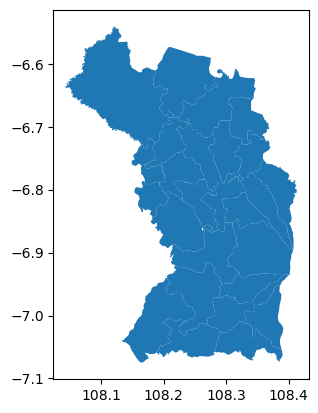

In [3]:
kecamatan_majalengka = [
    'ARGAPURA', 'KADIPATEN', 'SINDANG', 'CIGASONG', 'RAJAGALUH', 'KERTAJATI', 'BANJARAN',
    'SUKAHAJI', 'MAJA', 'LEUWIMUNDING', 'PALASAH', 'JATITUJUH', 'SINDANGWANGI', 'LEMAHSUGIH',
    'LIGUNG', 'DAWUAN', 'CIKIJING', 'MALAUSMA', 'SUMBERJAYA', 'PANYINGKIRAN', 'KASOKANDEL',
    'BANTARUJEG', 'CINGAMBUL', 'TALAGA', 'MAJALENGKA', 'JATIWANGI'
]
map_majalengka = map[map['KECAMATAN'].isin(kecamatan_majalengka)]

# ada beberapa kecamatan yang bukan di majalengka tetapi namanya sama, kita coba remove manual
map_majalengka = map_majalengka.explode(index_parts = 1).reset_index()
map_majalengka = map_majalengka.drop([1,8,11,18,20,22,28], axis=0)
map_majalengka = map_majalengka.drop(columns = ['level_0', 'level_1'])
map_majalengka.plot()

## Membaca Data Paslon Untuk Setiap Kecamatan

In [9]:
data_legislatif = pd.read_csv('./datasets/legislatif_majalengka.csv', sep=';')
data_legislatif.head()

,KECAMATAN,Nasdem,PKB,PKS,PDIP,Golkar,Gerindra,Demokrat,PAN,PPP,Hanura,PBB,PKPI
0,LEMAHSUGIH,1064,2684,1909,10335,4001,3072,1152,665,5354,434,528,136
1,BANTARUJEG,482,1559,983,10212,6110,1004,1784,496,2834,632,220,134
2,MALAUSMA,544,2323,1074,8834,4223,638,751,700,1200,1007,494,803
3,CINGAMBUL,2364,992,1695,5605,1928,768,395,950,2864,282,1738,389
4,CIKIJING,504,1723,6055,8774,2443,338,2026,4002,5561,592,1243,1585


## Method Pemetaan

In [5]:
def calculate_limits(index, dataset):
    data = dataset[index].tolist()
    average = np.mean(data)
    std = np.std(data, ddof=0)
    n = 1
    upper_limit = average + n * std
    lower_limit = average - n * std

    return upper_limit, lower_limit

In [88]:
def create_map(index, data):
  upper_limit, lower_limit = calculate_limits(index,data)

  merged_map =  map_majalengka.merge(data, on = 'KECAMATAN', how='outer')

  fig, ax = plt.subplots(1, 1, figsize=(12, 12))
  merged_map.plot(column=index, cmap='Spectral', legend=True, ax=ax, edgecolor='k', linewidth=0.5)

  lower_limit_str = f'{lower_limit:.2f}'
  upper_limit_str = f'{upper_limit:.2f}'

  cmap = matplotlib.cm.get_cmap('Spectral')
  patch1 = mpatches.Patch(color = cmap(0.66), label = f'> {upper_limit_str}')
  patch2 = mpatches.Patch(color = cmap(0.33), label = f'{lower_limit_str} - {upper_limit_str}')
  patch3 = mpatches.Patch(color = cmap(0.0), label = f'< {lower_limit_str}')
  plt.legend(handles=[patch1,patch2,patch3])

  plt.title("Pemetaan Perolehan Suara Partai " + index)
  for index, row in merged_map.iterrows():
    xy = row['geometry'].centroid.coords[:]
    xytext = row['geometry'].centroid.coords[:]
    plt.annotate(row['KECAMATAN'], xy=xy[0], xytext=xytext[0], horizontalalignment='center', verticalalignment='center')
    plt.axis('off')
  plt.show()

## Hasil Peta

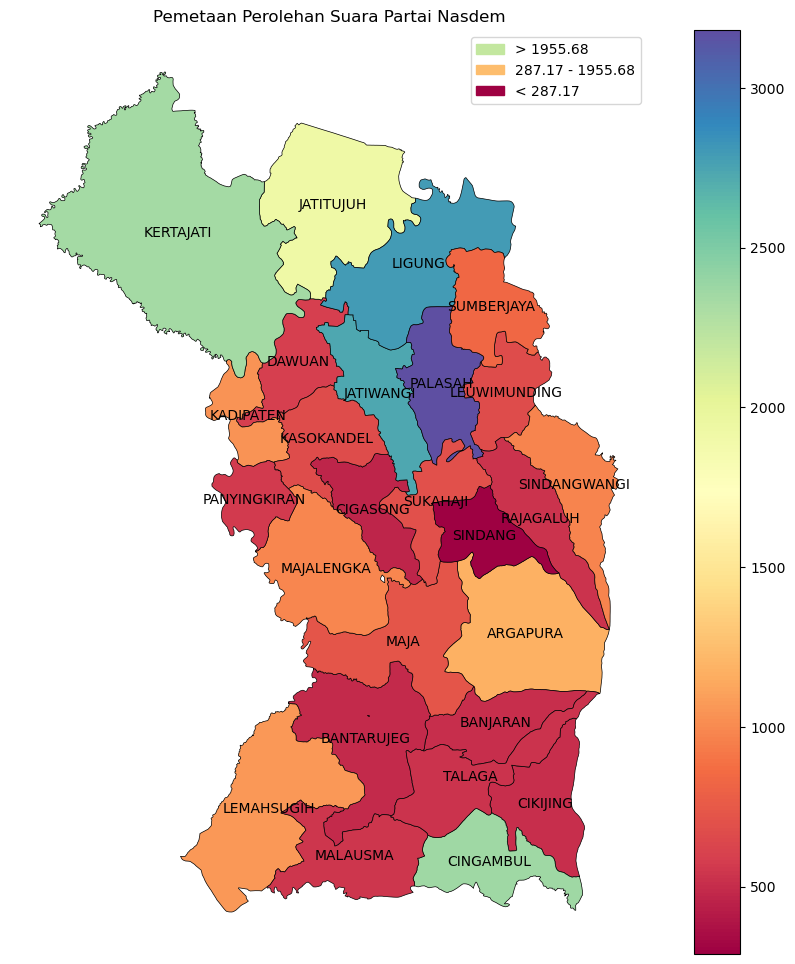

In [89]:
create_map('Nasdem', data_legislatif)

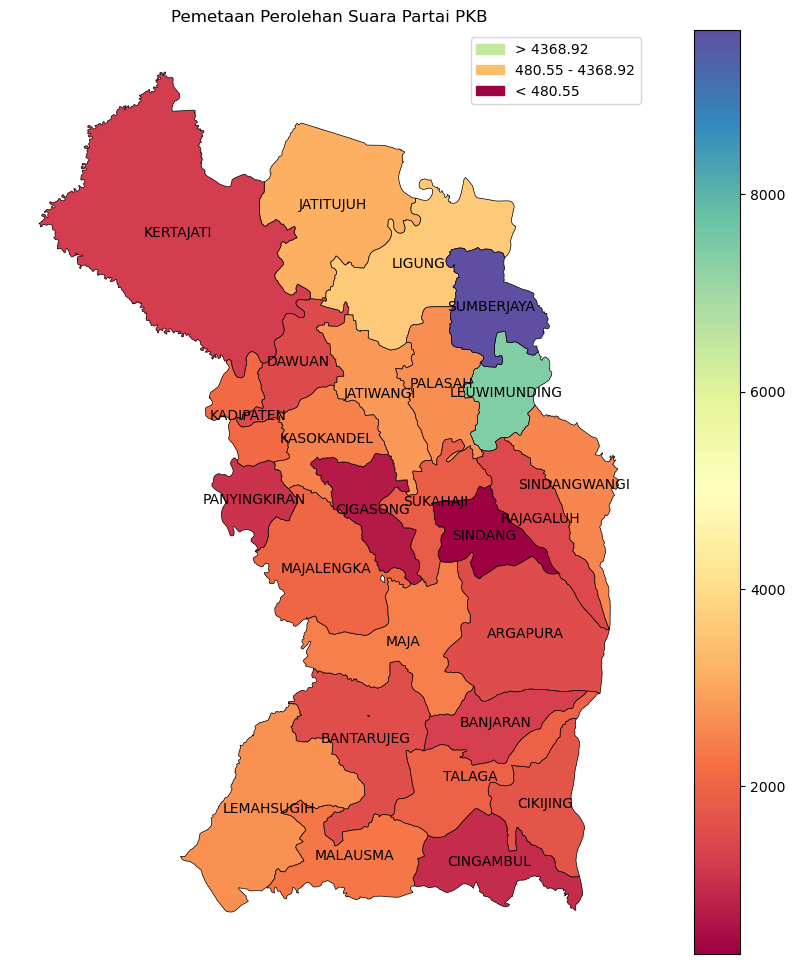

In [90]:
create_map('PKB',data_legislatif)

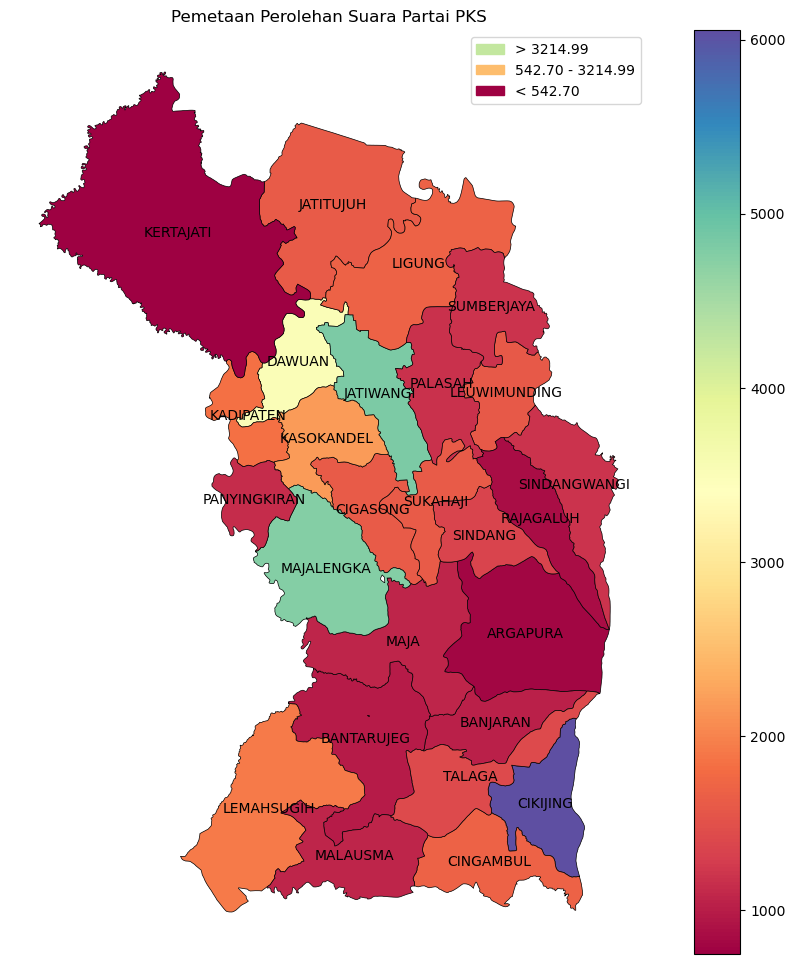

In [91]:
create_map('PKS',data_legislatif)

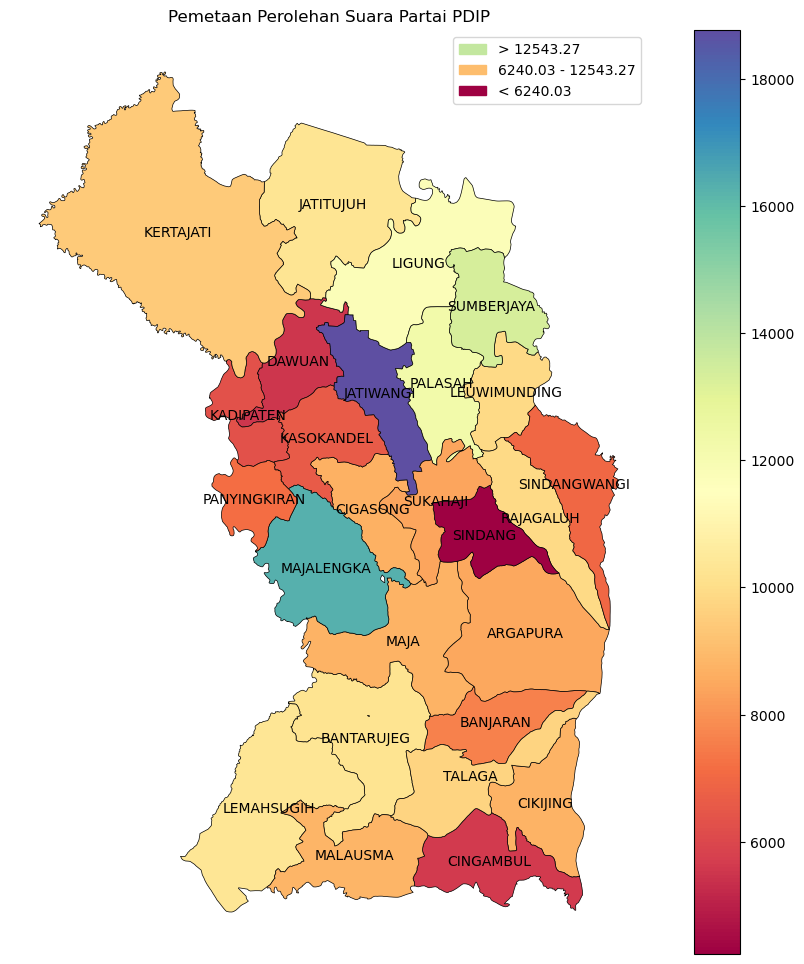

In [92]:
create_map('PDIP',data_legislatif)

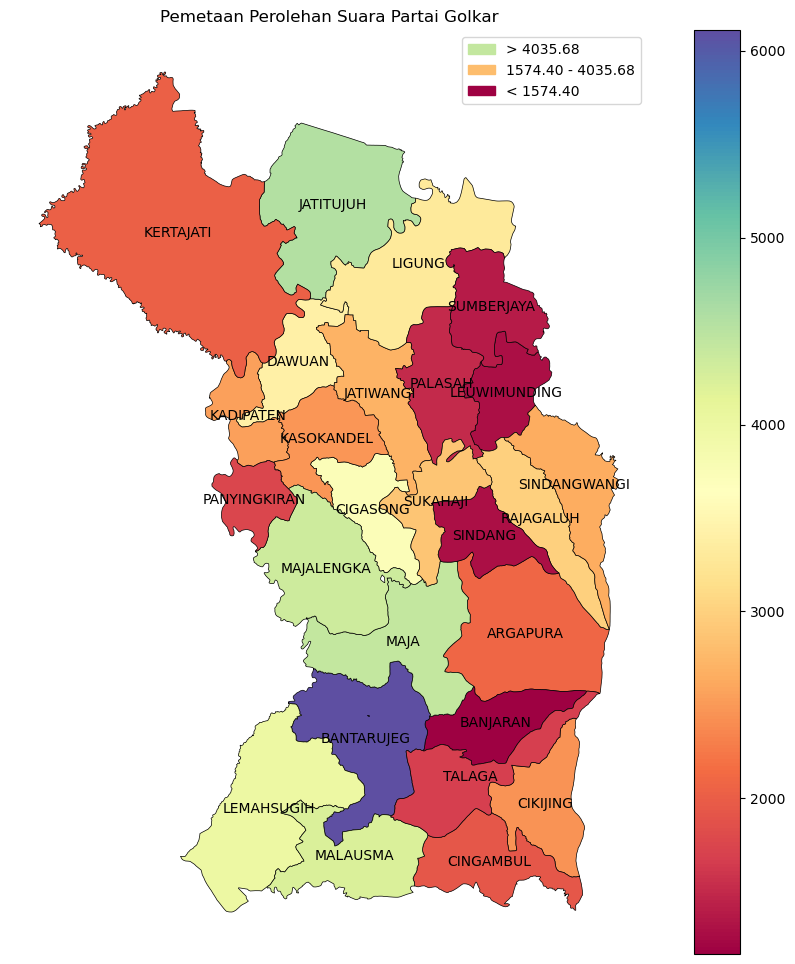

In [93]:
create_map('Golkar',data_legislatif)

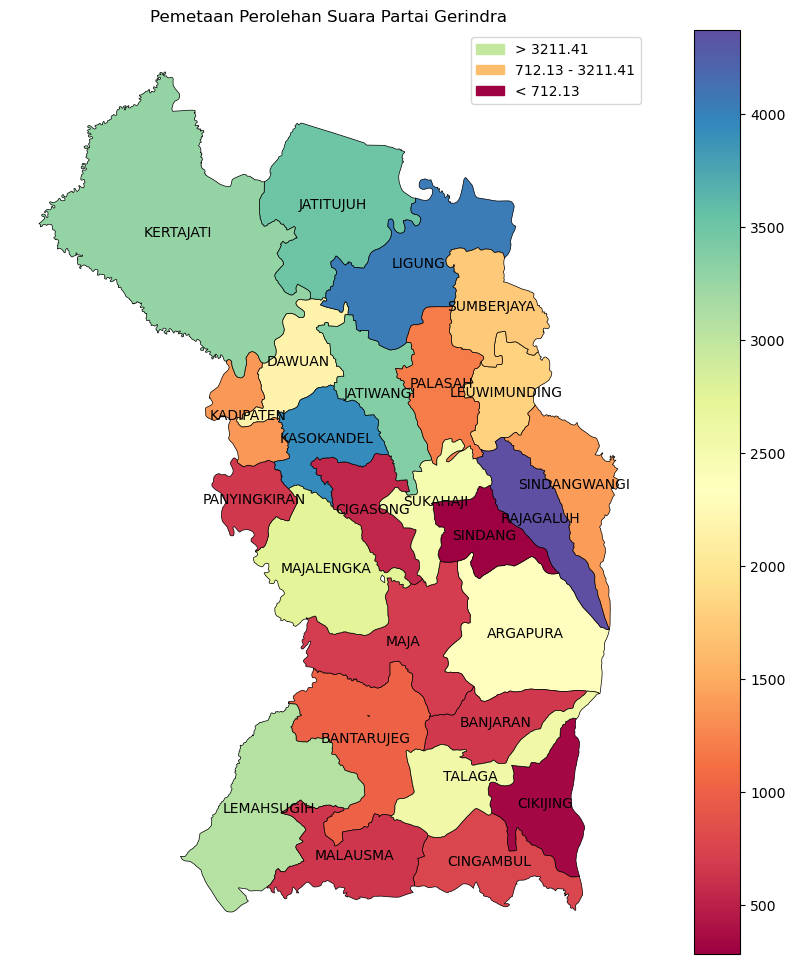

In [94]:
create_map('Gerindra',data_legislatif)

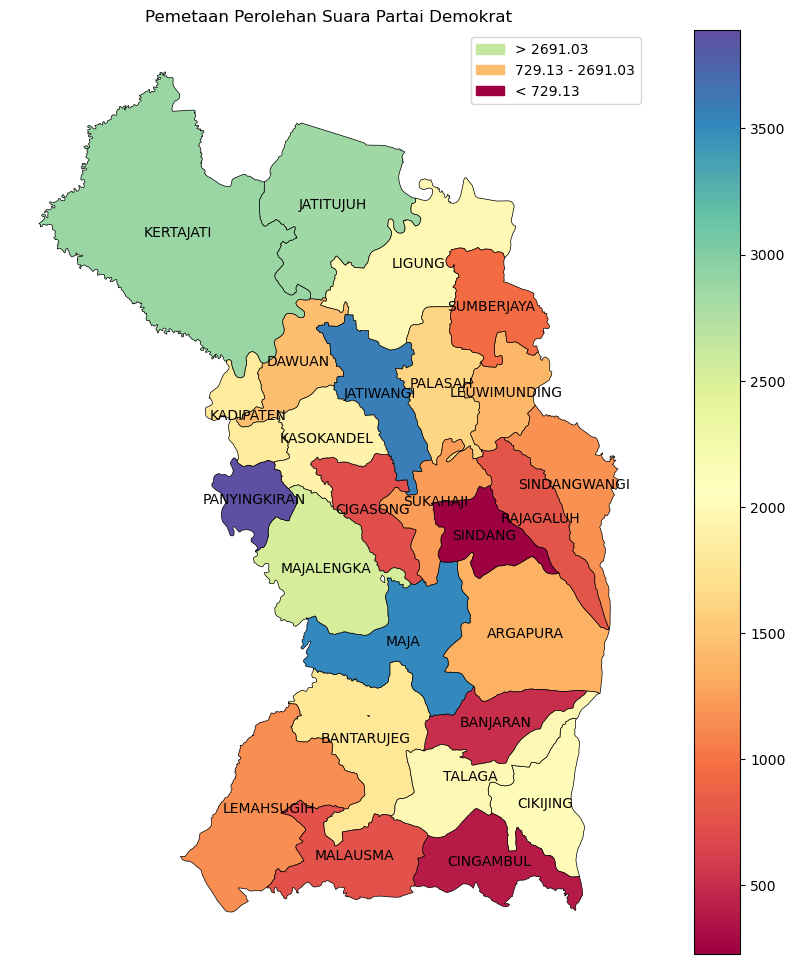

In [95]:
create_map('Demokrat',data_legislatif)

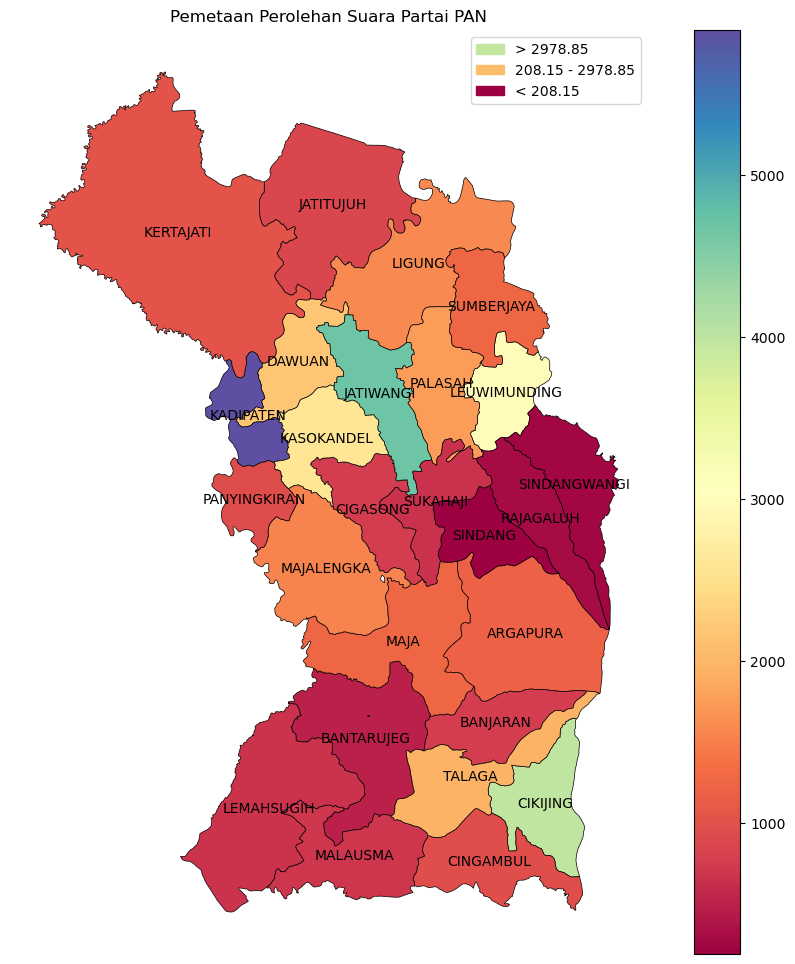

In [96]:
create_map('PAN',data_legislatif)

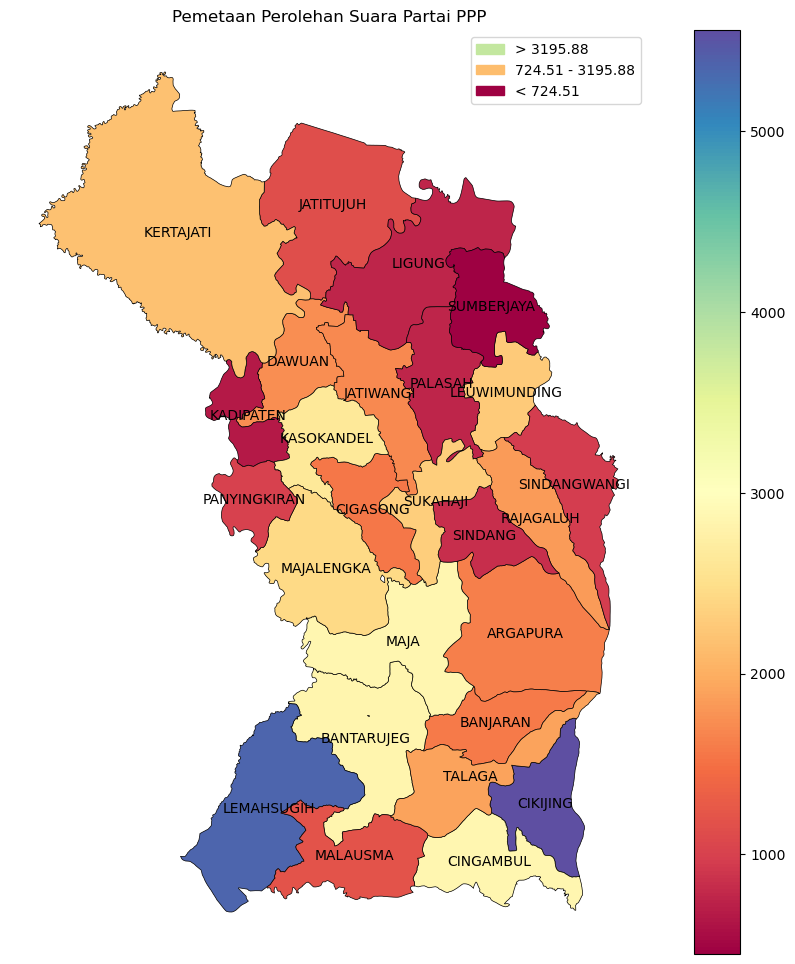

In [97]:
create_map('PPP',data_legislatif)

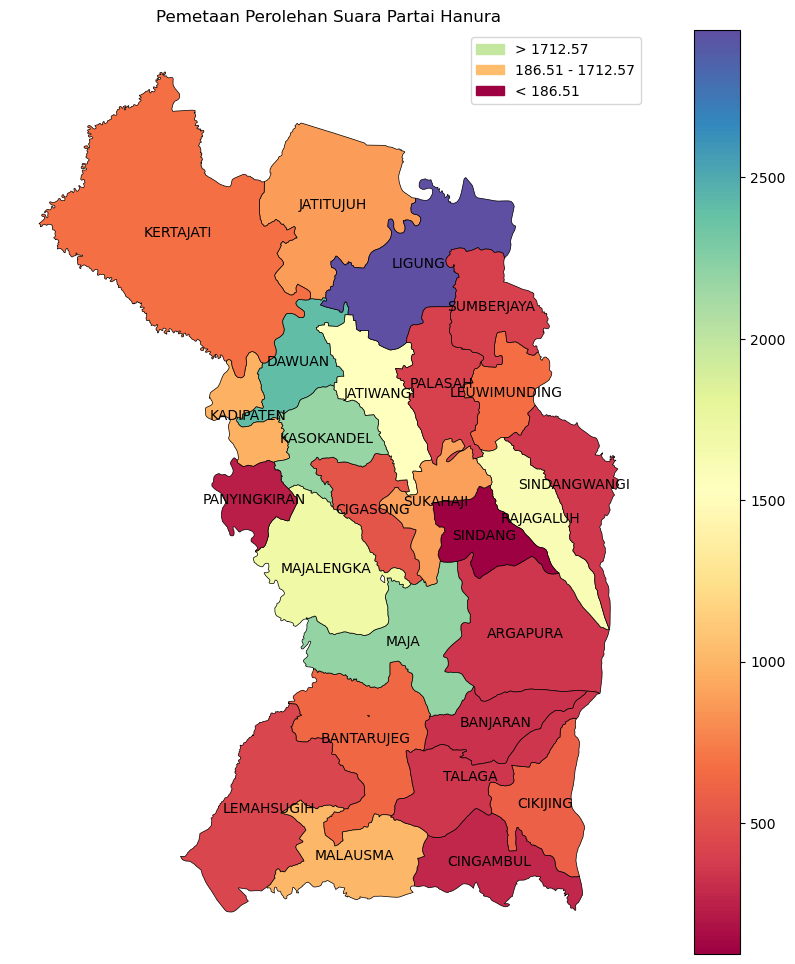

In [98]:
create_map('Hanura',data_legislatif)

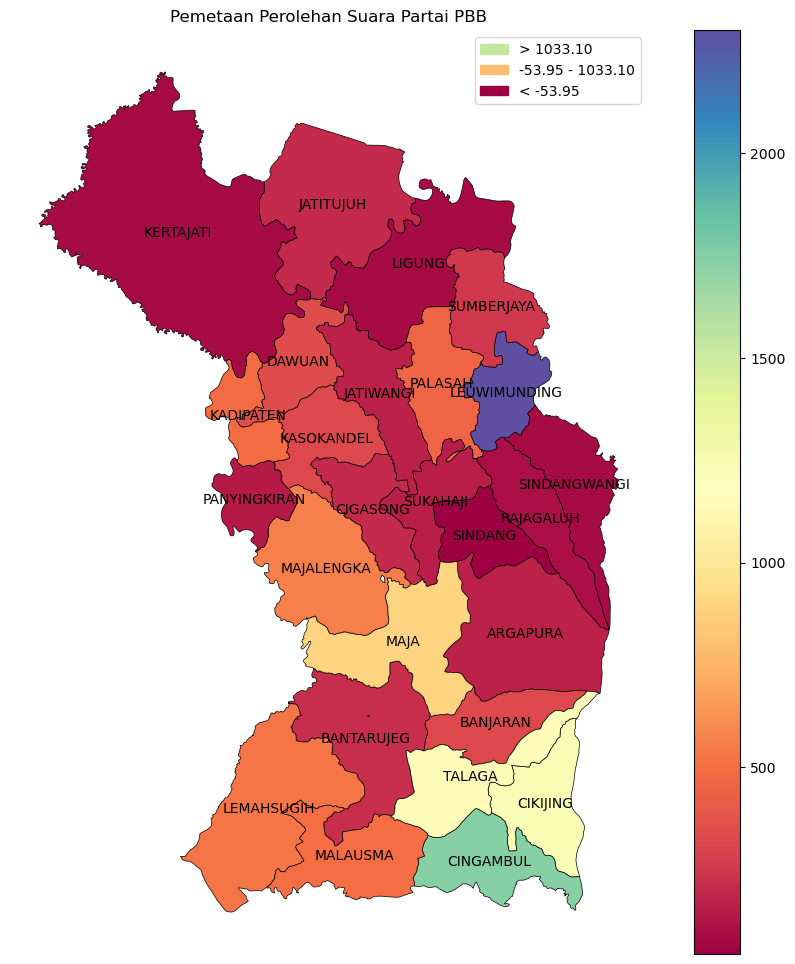

In [99]:
create_map('PBB',data_legislatif)

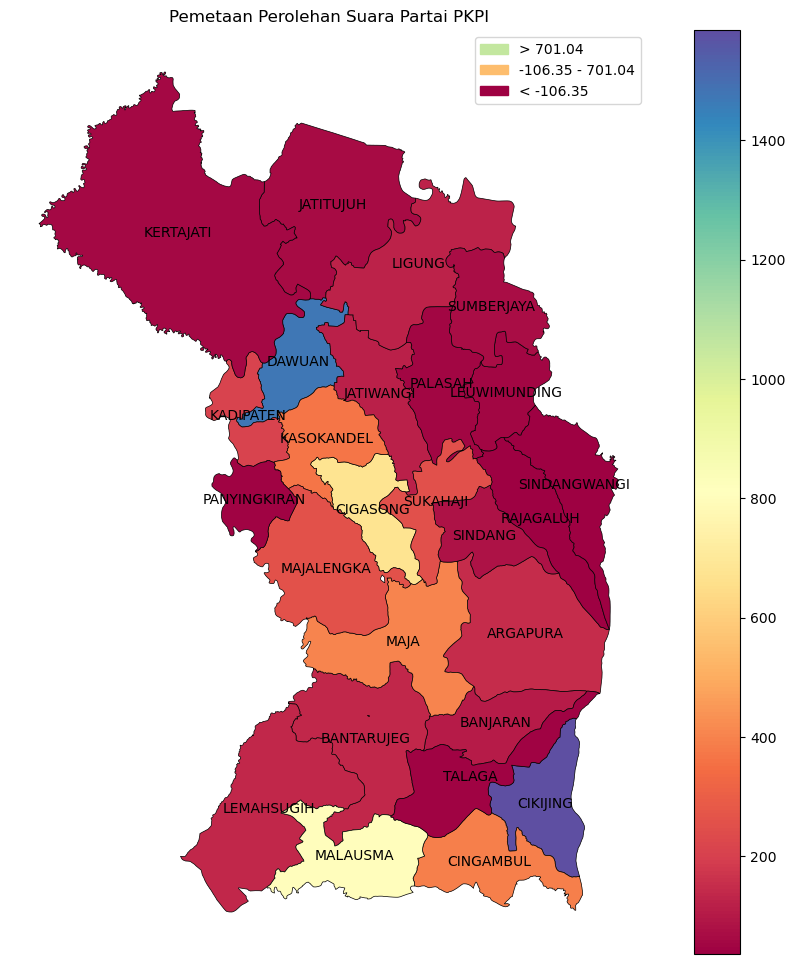

In [100]:
create_map('PKPI',data_legislatif)

C:\Users\Ariq Hakim Ruswadi\AppData\Local\Temp\ipykernel_1980\390444712.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(rekap.geometry.centroid.x, rekap.geometry.centroid.y, rekap['KECAMATAN']):
C:\Users\Ariq Hakim Ruswadi\AppData\Local\Temp\ipykernel_1980\390444712.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(rekap.geometry.centroid.x, rekap.geometry.centroid.y, rekap['KECAMATAN']):


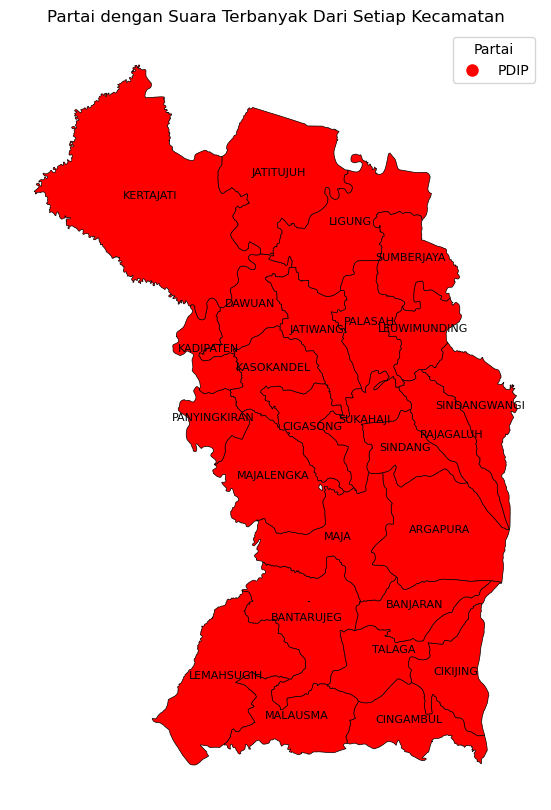

In [85]:
rekap = map_majalengka.merge(data_legislatif, on = 'KECAMATAN')
rekap['Pemenang'] = rekap[['Nasdem','PKB','PKS','PDIP','Golkar','Gerindra','Demokrat','PAN','PPP','Hanura','PBB','PKPI']].idxmax(axis=1)

color_schema = {'PDIP': 'red'}

rekap['Warna'] = rekap['Pemenang'].map(color_schema)

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
rekap.plot(ax=ax, color=rekap['Warna'], edgecolor='k', linewidth=0.5)

for x, y, label in zip(rekap.geometry.centroid.x, rekap.geometry.centroid.y, rekap['KECAMATAN']):
    ax.text(x, y, label, fontsize=8, ha='center')

plt.title("Partai dengan Suara Terbanyak Dari Setiap Kecamatan", fontsize=12)
categories = ['PDIP']
colors = ['Red']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=cat, markersize=10, markerfacecolor=col) for cat, col in zip(categories, colors)]
plt.legend(handles=legend_handles, title="Partai")
plt.axis('off')

plt.show()